<a href="https://colab.research.google.com/github/Maagnitude/fetal_health_models/blob/main/fetal_health_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Βιβλιοθήκες**
Κάνουμε import τα απαραίτητα **modules**. 
*   Την **pandas** και την **numpy** για την διαχείρηση των δεδομένων μας.

*  Την **matplotlib.pyplot** και την **seaborn** για την οπτικοποίηση των δεδομένων μας. **Ιστογράμματα**, **boxplots** κλπ.

*  Την **StardardScaler** και την **train_test_split** για το **Preprocessing** κομμάτι. Συγκεκριμένα για την τυποποίηση των δεδομένων και για να χωρίσουμε τα δεδομένα μας σε **30% test data** και **70% train data**.

*  Την **missingno** ώστε να οπτικοποιήσουμε το αν υπάρχουν ελλιπείς εγγραφές.

*   Από την **sklearn** κάνουμε import:
      *   Την **preprocessing** για να ____
      *   Την **neural_network** για να ___
      *   Την **model_selection** για να ___
      *   Την **linear_model** για να ___
      *   Την **metrics** για να ____
      *   Και τέλος την **impute** για να ____










In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import missingno as msno
from sklearn import neural_network
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn import impute

import warnings
warnings.filterwarnings(action='ignore')

# **Drive mount**
Κάνουμε import το **drive** για να κάνουμε **mount** στο **google colab** τα αρχεία του drive μας, ώστε να περάσουμε το **fetal_health.csv** στο πρόγραμμα μας. Το παρακάτω block κώδικα το έχω κάνει comment γιατί θα ανεβάσουμε το dataset μέσω του github link, από το repository μου.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# path = "/content/drive/MyDrive/Colab Notebooks/fetal_health.csv"
# df = pd.read_csv(path, keep_default_na=False)
# df.head()

# **read_csv**
Περνάμε το url του dataset στην μεταβλητή df με την χρήση της μεθόδου read_csv, και εκτυπώνουμε τις 5 πρώτες γραμμές για να δούμε ότι έγιναν όλα σωστά.

In [4]:
url = "https://raw.githubusercontent.com/Maagnitude/fetal_health_models/main/fetal_health.csv"
df = pd.read_csv(url)
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [6]:
print("Table's shape is: ", df.shape[0], " rows x ", df.shape[1], " columns.")

Table's shape is:  2126  rows x  22  columns.


# **Info**
Με την **info()** τυπώνουμε την συνοπτική περίληψη του dataframe. Συγκεκριμένα τυπώνουμε τον τύπο δεδομένων των στηλών και πόση μνήμη χρησιμοποιείται. Επίσης παρατηρούμε ότι δεν έχουμε missing values, καθώς όλες οι στήλες έχουν **2126** τιμές και είναι **non-null**. Το βλέπουμε και πιο καθαρά με την **isna().sum()** πατακάτω, που αφορά και τις NaN τιμές.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [24]:
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

# **Οπτική απόδειξη**
Με την χρήση της συνάρτησης **bar()** της βιβλιοθήκης **missingno**, βλέπουμε ότι **δεν υπάρχουν** ελλιπείς εγγραφές, καθώς οι μπάρες σε κάθε χαρακτηριστικό φτάνουν στο 1.0

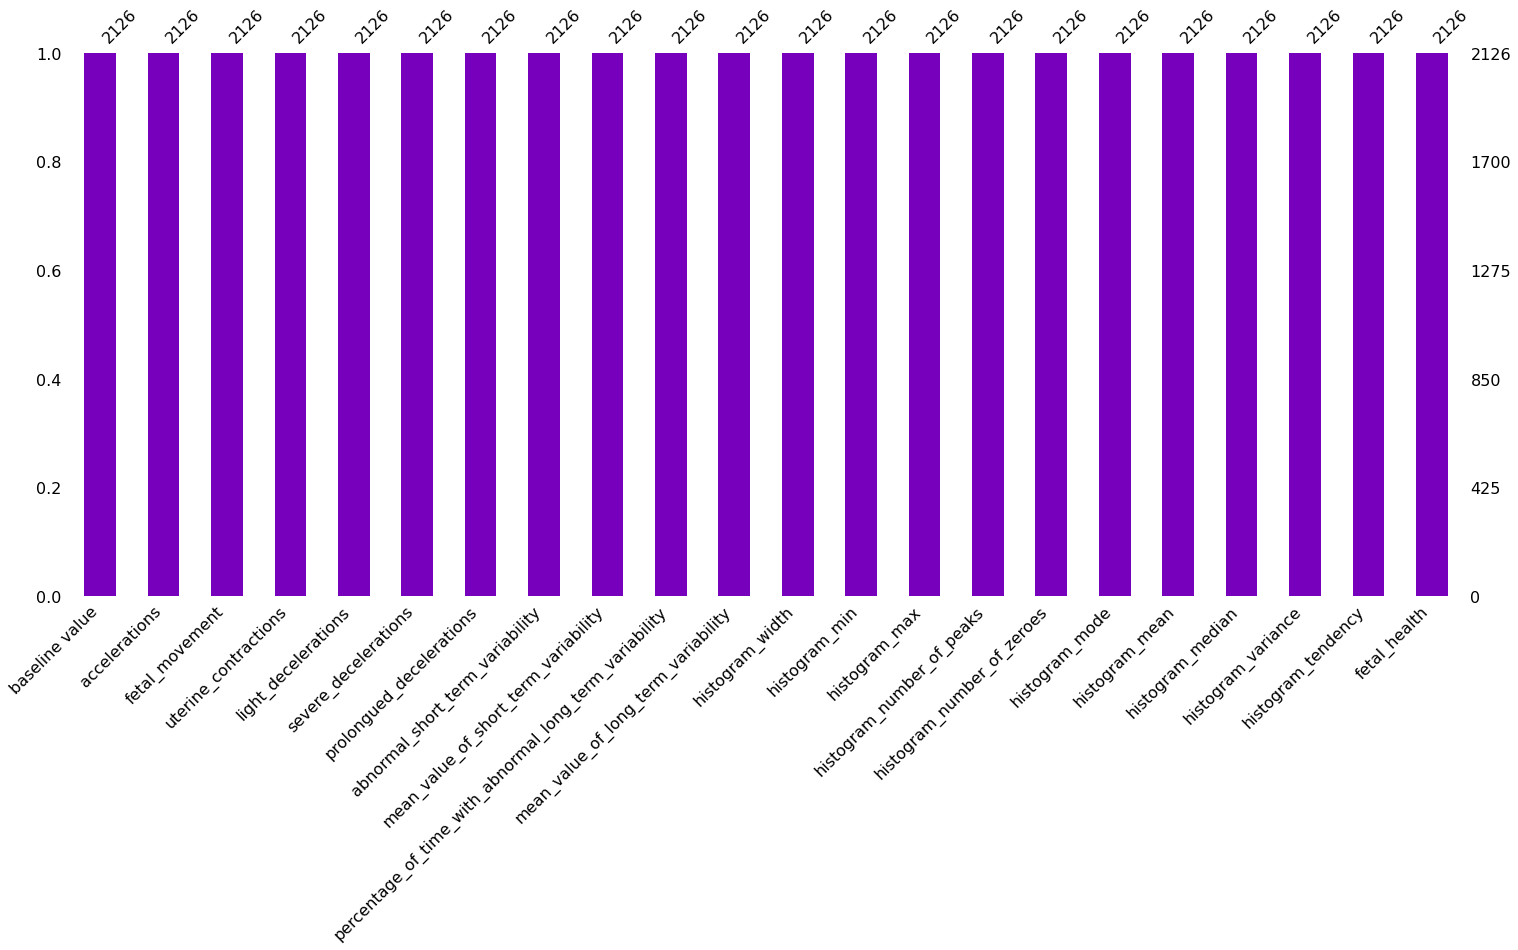

In [32]:
null_plot = msno.bar(df, color="#7600BC")

Με την **copy()** δημιουργούμε ένα αντίγραφο της **df** για να το χρησιμοποιήσουμε στην **διερεύνηση των δεδομένων** **(EDA)**, ώστε να μην πειράξουμε το αρχικό **dataframe**.

In [8]:
eda_df = df.copy()

# **Ιστόγραμμα**
Εδώ τυπώνουμε το **Ιστόγραμμα** κάθε χαρακτηριστικού, με την μέθοδο **hist()**, και τα καταχωρούμε στην μεταβλητή **df_histplot**.

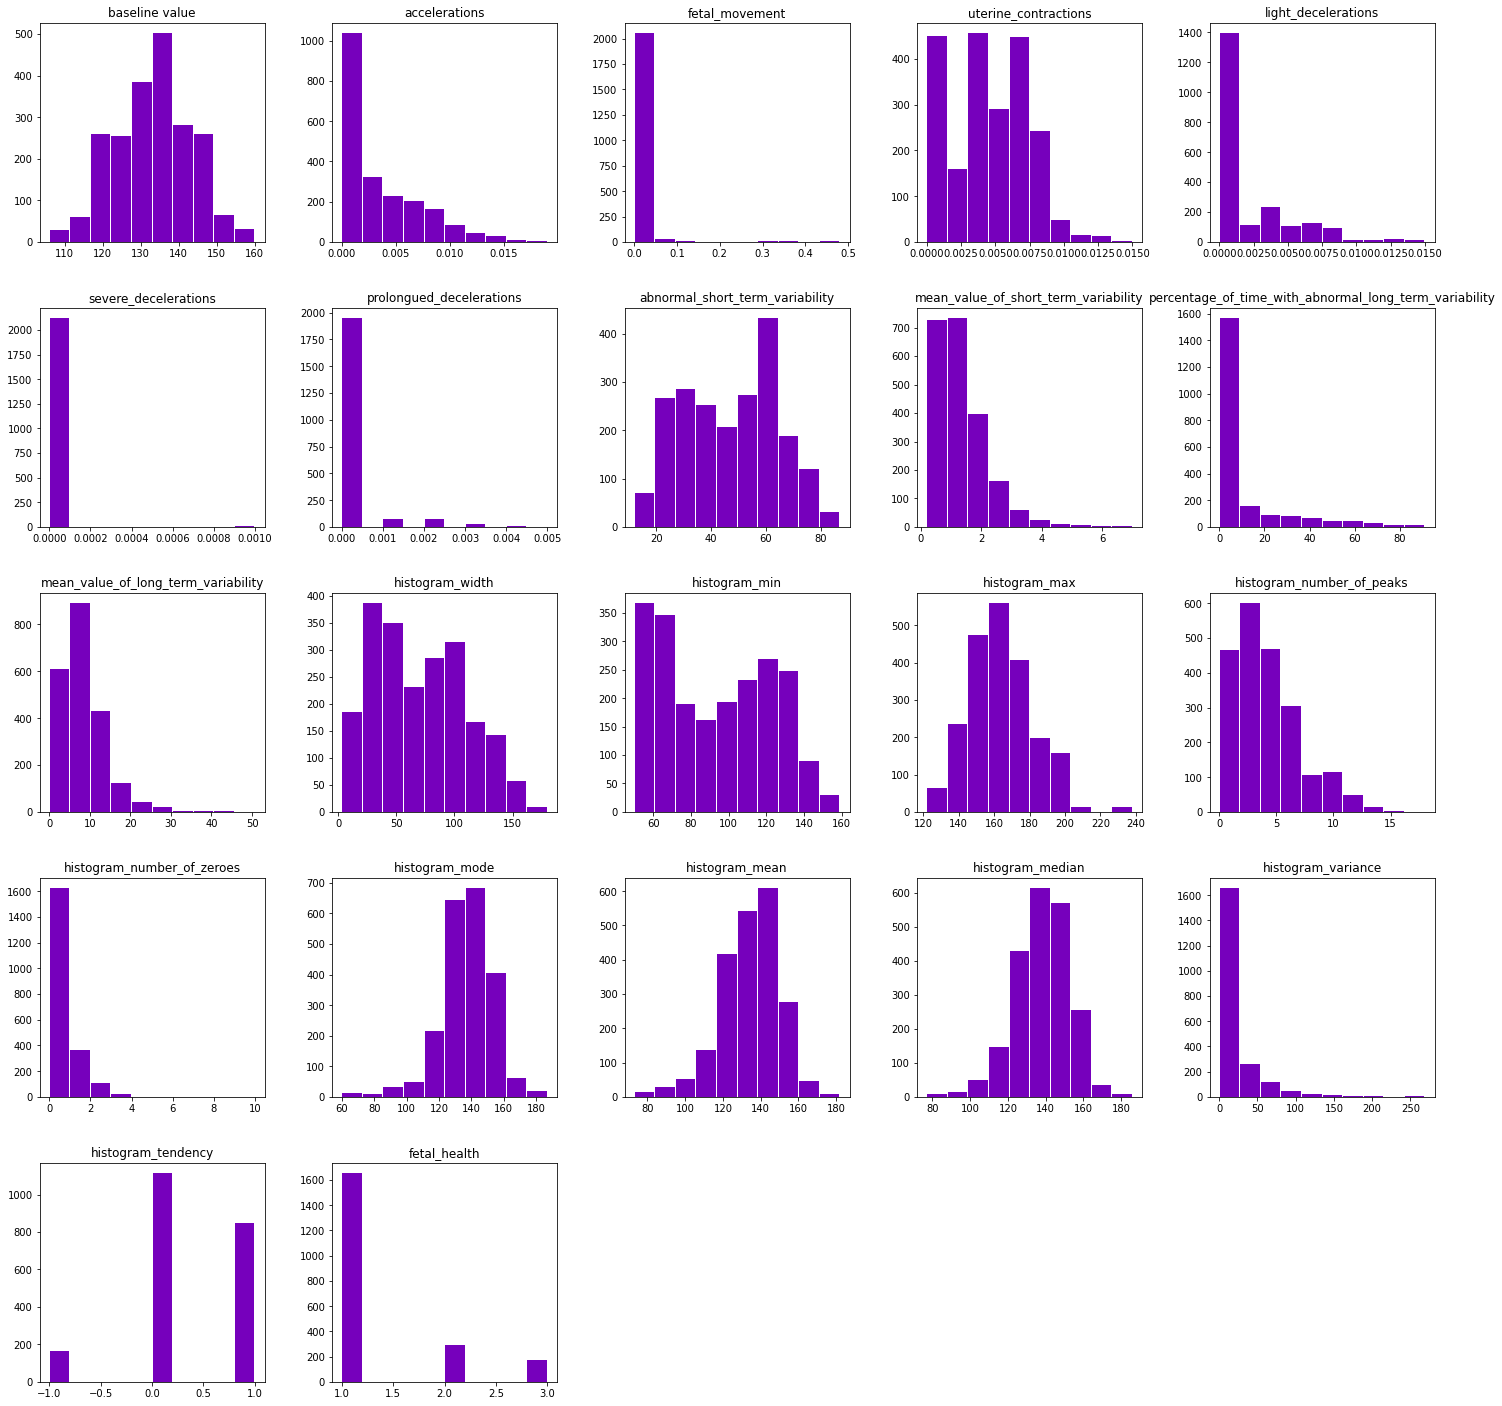

In [9]:
edadf_histplot = eda_df.hist(grid=False, figsize=(25,25), color='#7600BC', zorder=2, rwidth=0.95)

# **Describe**
Παρακάτω εμφανίζουμε την στατιστική ανάλυση των δεδομένων μας, με την χρήση της μεθόδου describe(). Παρατηρούμε ότι το 75% των δειγμάτων μας ανήκει στην κατηγορία 1 του fetal_health, δηλαδή 'φυσιολογικό'. Επίσης η στατιστική ανάλυση αφορά και τις 22 στήλες, μιας και έχουμε μόνο αριθμητικά χαρακτηριστικά, κι έτσι θα είναι και πιο εύκολη η επεξεργασία των δεδομένων και η υλοποίηση των μοντέλων μας.

Σημ: Με **Transpose (.T)** ο πίνακας είναι πιο ευκρινής. Στην αρχή τον είχα αλλιώς, και ήταν κουραστικό.

In [29]:
eda_df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


# **Υπολογισμός**
Εδώ υπολογίζουμε με ακρίβεια πόσες από τις εγγραφές ανήκουν σε κάθε **κατηγορία**, ελέγχοντας αν ο αριθμός σε κάθε εγγραφή είναι 0, 1 ή 2, για **normal**, **suspect** ή **pathological**.
Ύστερα ανακάλυψα ότι υπάρχει συνάρτηση για κάτι τέτοιο. Η **value_counts()**, οπότε τσάμπα έγραψα το παρακάτω **μπλοκ**. Βγάζει όμως το ίδιο αποτέλεσμα και το κράτησα κι αυτό για τον κόπο μου.

In [28]:
normal = 0
suspect = 0
pathol = 0
for i in range(eda_df.shape[0]):  
  if (eda_df["fetal_health"][i] == 1):
    normal += 1
  elif (eda_df["fetal_health"][i] == 2):
    suspect += 1
  else:
    pathol += 1

print("Normal       (1.0) = ", normal)
print("Suspect      (2.0) = ", suspect)
print("Pathological (3.0) = ", pathol, "\n")

#OR

print(eda_df["fetal_health"].value_counts())

Normal       (1.0) =  1655
Suspect      (2.0) =  295
Pathological (3.0) =  176 

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64


# **Category Pie Plot**
Εδώ οπτικοποιούμε τα αποτελέσματα του προηγούμενου υπολογισμού, σε ένα διάγραμμα πίτας, βάζοντας και τα ποσοστά, ώστε να δούμε πόσες εγγραφές έχουμε σε κάθε κατηγορία σε σχέση με το σύνολο.
Παρατηρούμε ότι έχουμε μεγάλο ποσοστό **Normal**, όπως είδαμε και τον υπολογισμό παραπάνω, που σημαίνει ότι το σύνολο δεδομένων **δεν είναι ισορροπημένο**, μιας και απ τις 3 κατηγορίες (classes) η πρώτη καταλαμβάνει το **77.85%**

<function matplotlib.pyplot.show(*args, **kw)>

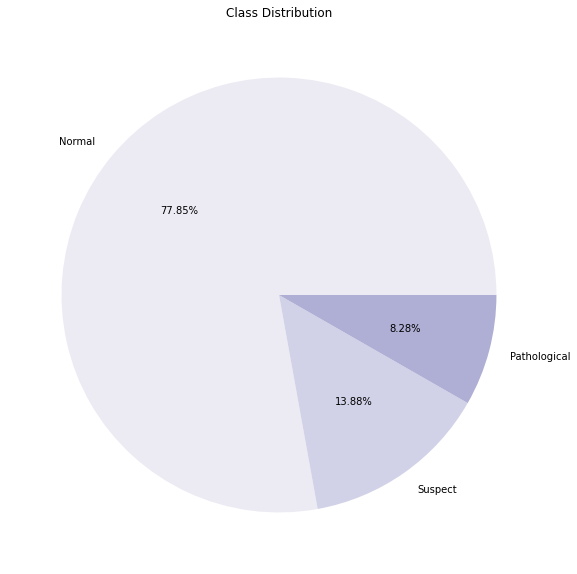

In [33]:
plt.figure(figsize=(10, 10))

plt.pie(
    eda_df['fetal_health'].value_counts(),
    labels=["Normal", "Suspect", "Pathological"],
    autopct='%.2f%%',
    colors=sns.color_palette('Purples')
)

plt.title("Class Distribution")
plt.show

#**Boxplot**

Ύστερα τυπώνουμε το **boxplot** κάθε χαρακτηριστικού με τη χρήση της συνάρτησης **boxplot()** της βιβλιοθήκης **seaborn**.

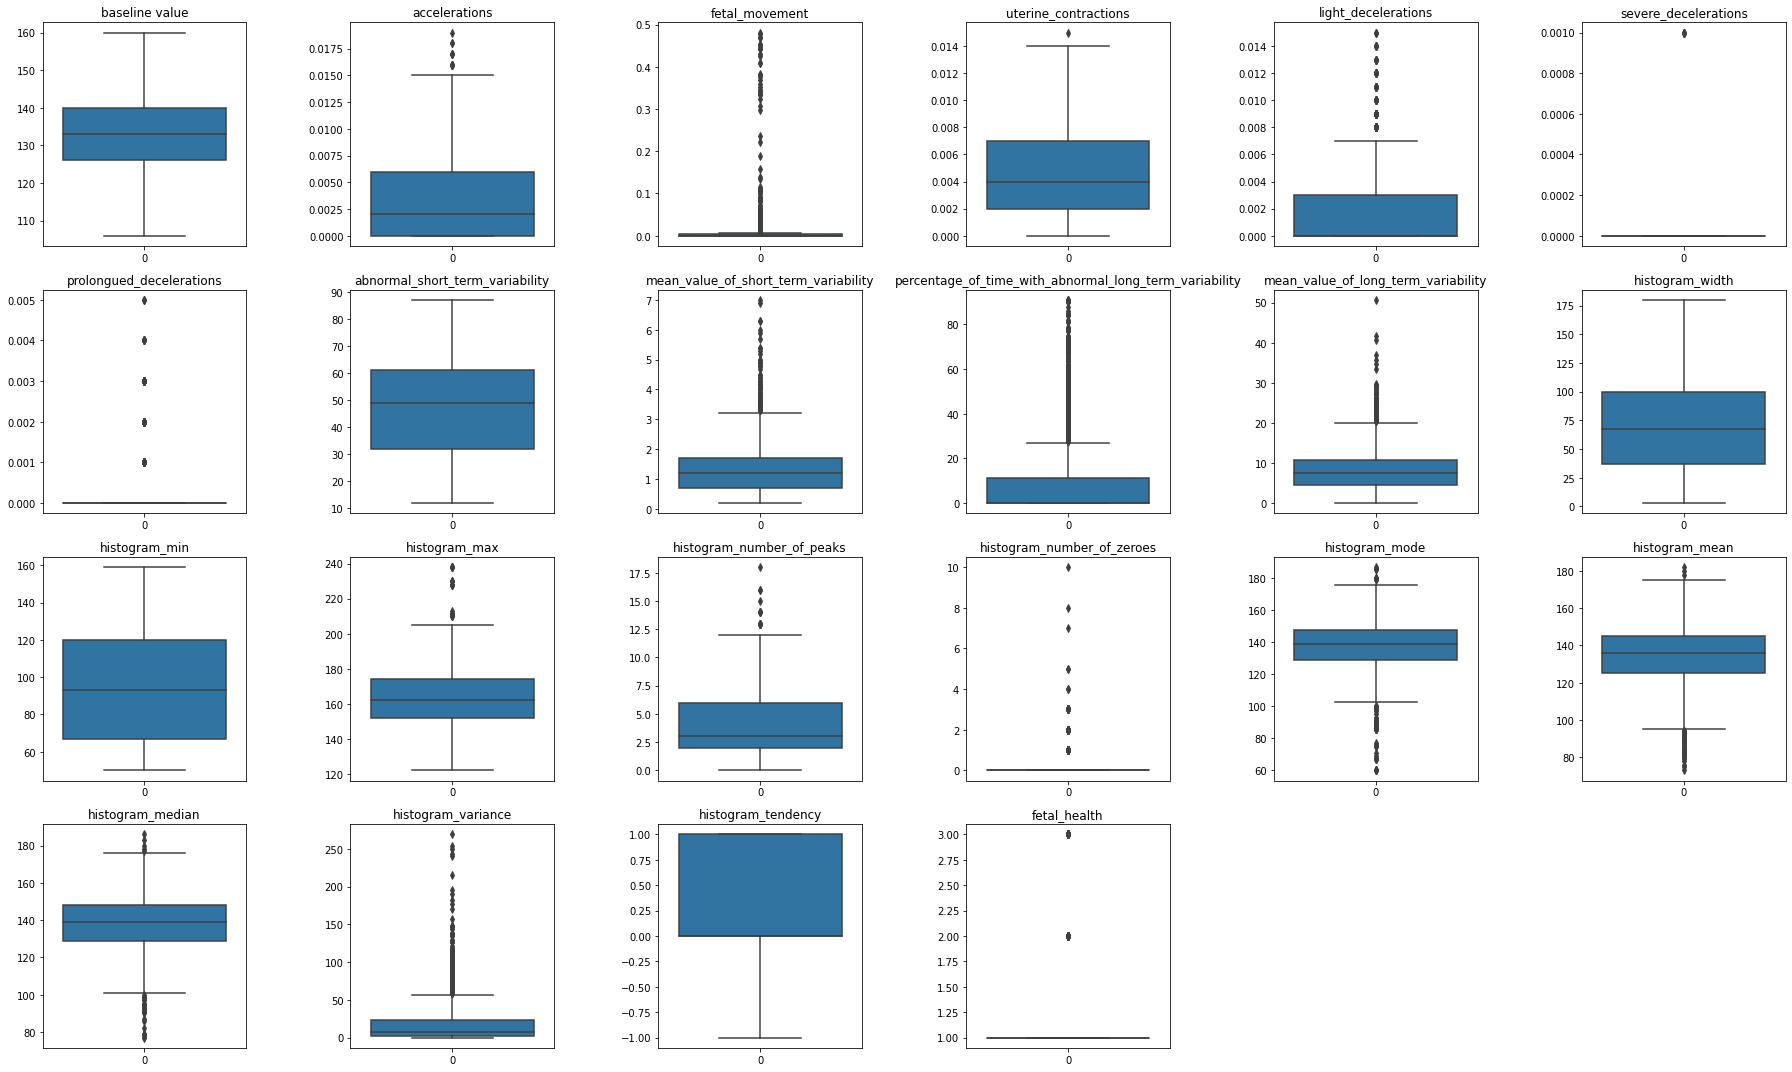

In [ ]:
plt.figure(figsize=(25, 15))

for i, column in enumerate(eda_df.columns):
  plt.subplot(4, 6, i + 1)
  sns.boxplot(data=eda_df[column])
  plt.title(column)

plt.tight_layout()
plt.show()

# **Ετεροσυσχέτιση**
Με την χρήση της συνάρτησης **corr()** της βιβλιοθήκης **pandas**, ελέγχουμε την **ετεροσυσχέτιση** μεταξύ των χαρακτηριστικών.

In [ ]:
corr = eda_df.corr()

# **Heatmap**
Εδώ οπτικοποιούμε την **ετεροσυσχέτιση** των χαρακτηριστικών. Αυτήν η δισδιάστατη αναπαράσταση μας βοηθάει να καταλάβουμε πολύ πιο εύκολα την ετεροσυσχέτιση, μέσω των χρωμάτων. Παρατηρούμε ότι η ισχυρότερη συσχέτιση με το **fetal health** είναι το **prolonged decelerations** (**0.48**)

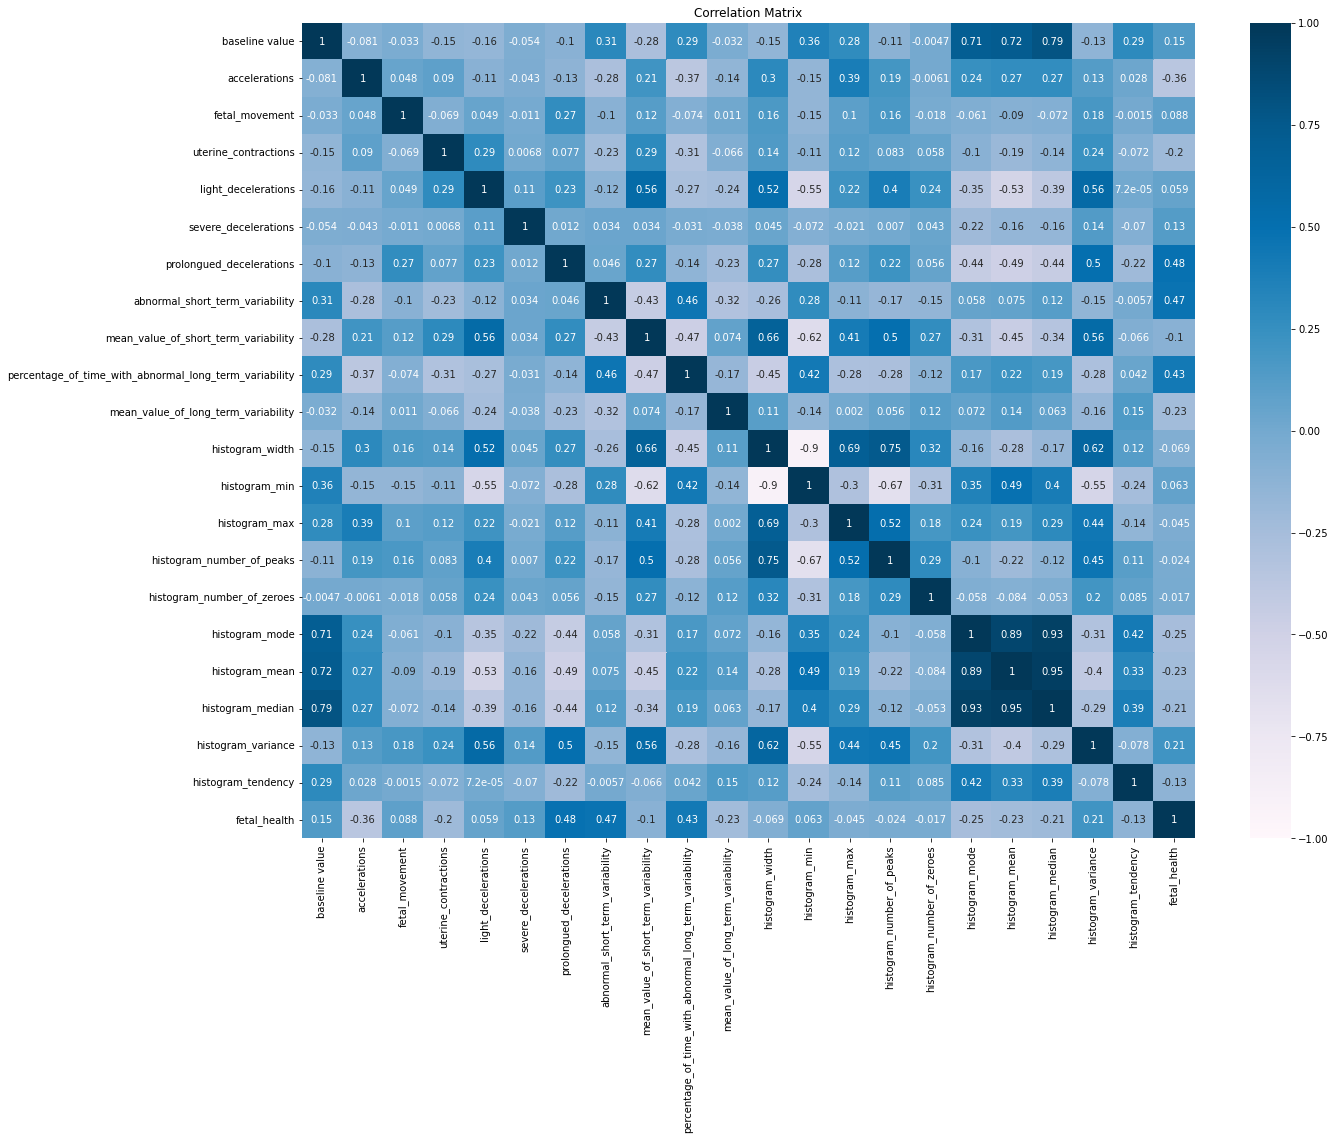

In [ ]:
plt.figure(figsize=(20,15))
heat = sns.heatmap(corr, annot=True, vmin=-1.0, cmap='PuBu')
plt.title("Correlation Matrix")
plt.show()

# **Δεν υπάρχουν ελλιπείς εγγραφές.**
Με την χρήση της συνάρτησης **isnull()** της βιβλιοθήκης **pandas**, θα αποδείξουμε ότι **δεν υπάρχουν ελλιπείς εγγραφές**, δηλαδή ότι έχουμε ένα **πλήρες** σύνολο δεδομένων, όπως είδαμε και πιο πάνω με την **info()**.

In [ ]:
print("Are there missing values? ", "Yes" if (df.isnull().values.any()) else "No")

Are there missing values?  No


In [ ]:
def preprocess_inputs(df):
  df = df.copy()

  # Rename target values
  df['fetal_health'].replace({
      1.0: "Normal", 
      2.0: "Suspect",
      3.0: "Pathological"
  })

  # Split df into X and y
  y = df['fetal_health']
  X = df.drop('fetal_health', axis=1)

  # Train-test split
  X_train, X_test, y_train, y_test = \
  train_test_split(X, y, train_size=0.7, shuffle=True, random_state=42)

  # Scale X
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
  X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

  return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = preprocess_inputs(df)

In [ ]:
X_train

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
1718,-0.206477,1.211917,-0.207482,-0.833364,-0.297336,-0.063628,-0.274719,0.431726,0.186101,-0.52269,...,0.399489,-0.350816,0.288419,1.007014,-0.473891,0.814871,0.478016,0.621293,0.096860,1.122236
857,0.899419,-0.833257,-0.207482,-0.156668,-0.636887,-0.063628,-0.274719,-0.146655,-0.610295,-0.46668,...,-0.992703,1.102038,-0.332173,-1.023847,-0.473891,0.457702,0.730044,0.621293,-0.580749,-0.519737
1075,0.396739,-0.321964,-0.207482,0.858376,1.400422,-0.063628,-0.274719,-1.129903,0.299872,-0.52269,...,0.270583,-0.249454,0.175584,-0.685370,-0.473891,0.398174,0.099973,0.213132,0.130740,1.122236
371,0.497275,-0.833257,-0.028021,-0.833364,0.042216,-0.063628,-0.274719,0.489564,-0.724065,-0.52269,...,-0.580201,0.324930,-0.727095,-0.008416,-0.473891,0.398174,0.352001,0.349186,-0.479108,1.122236
222,-0.407549,-0.321964,0.051740,-1.510060,-0.636887,-0.063628,-0.274719,0.026859,-0.496524,-0.52269,...,0.863554,-1.398222,-0.445008,0.668537,-0.473891,-0.256635,-0.089048,-0.263055,-0.512988,1.122236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,-0.307013,1.467564,-0.187542,-0.156668,-0.297336,-0.063628,-0.274719,0.316050,-0.041441,-0.52269,...,0.734647,-0.688688,0.457671,0.668537,-0.473891,0.398174,0.415009,0.417213,-0.106423,1.122236
1095,-1.010765,2.234504,-0.207482,-0.833364,-0.636887,-0.063628,-0.274719,-1.419094,0.982496,-0.52269,...,-0.477076,0.223568,-0.670677,-0.685370,-0.473891,-0.375691,-0.152055,-0.331082,-0.512988,-0.519737
1130,-1.111301,0.444977,-0.207482,-0.156668,1.060870,-0.063628,-0.274719,-1.534770,1.437580,-0.52269,...,0.708866,-1.127923,-0.332173,0.668537,-0.473891,-0.375691,-0.845134,-0.807270,0.401784,-0.519737
1294,-1.815053,-0.066317,-0.207482,1.196725,0.042216,-0.063628,1.341018,-1.303418,0.299872,-0.52269,...,0.966679,-0.756263,0.852593,-0.346893,2.618869,-0.256635,-0.782127,-0.603189,0.876110,-0.519737


In [ ]:
y_train

1718    1.0
857     1.0
1075    1.0
371     1.0
222     1.0
       ... 
1638    1.0
1095    1.0
1130    1.0
1294    1.0
860     1.0
Name: fetal_health, Length: 1488, dtype: float64

Τώρα με την **describe()**, παρατηρούμε ότι οι **μέσοι** όλων των χαρακτηριστικών είναι κοντά στο 0, και οι **τυπικές αποκλίσεις** τους είναι κοντά στο 1.

In [ ]:
X_train.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
count,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,...,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03
mean,-7.950629e-16,2.865092e-17,5.491426e-17,-9.550306e-17,-8.356517e-17,8.356517e-18,-3.342607e-17,-1.778744e-16,-6.267388e-18,-7.162729e-18,...,1.074409e-16,-2.459204e-16,6.565835e-16,1.193788e-16,3.342607e-17,-7.520866e-17,4.070818e-16,-5.061662e-16,2.387576e-17,3.103849e-17
std,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00,...,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00
min,-2.719876e+00,-8.332572e-01,-2.074824e-01,-1.510060e+00,-6.368872e-01,-6.362848e-02,-2.747186e-01,-1.997475e+00,-1.292919e+00,-5.226904e-01,...,-1.740362e+00,-1.465796e+00,-2.363200e+00,-1.362324e+00,-4.738906e-01,-4.602184e+00,-3.869475e+00,-4.140584e+00,-6.485103e-01,-2.161711e+00
25%,-7.091569e-01,-8.332572e-01,-2.074824e-01,-8.333641e-01,-6.368872e-01,-6.362848e-02,-2.747186e-01,-8.407128e-01,-7.240654e-01,-5.226904e-01,...,-8.637961e-01,-9.251995e-01,-6.706774e-01,-6.853702e-01,-4.738906e-01,-4.947471e-01,-5.931053e-01,-6.712162e-01,-5.807494e-01,-5.197374e-01
50%,-5.405159e-03,-3.219637e-01,-2.074824e-01,1.816802e-01,-6.368872e-01,-6.362848e-02,-2.747186e-01,2.685896e-02,-1.552115e-01,-5.226904e-01,...,-7.746530e-02,-1.294271e-02,-1.065031e-01,-3.468933e-01,-4.738906e-01,1.005336e-01,9.997299e-02,7.707877e-02,-4.113471e-01,-5.197374e-01
75%,6.983466e-01,7.006233e-01,-1.476619e-01,8.583764e-01,3.817672e-01,-6.362848e-02,-2.747186e-01,8.365926e-01,4.136425e-01,3.741569e-02,...,7.862095e-01,8.993141e-01,5.705061e-01,6.685373e-01,-4.738906e-01,6.362863e-01,6.670370e-01,6.893201e-01,1.646208e-01,1.122236e+00
max,2.709066e+00,3.768384e+00,9.383745e+00,3.565161e+00,4.456385e+00,1.571623e+01,7.803962e+00,2.340384e+00,6.443494e+00,4.574275e+00,...,2.822935e+00,2.217018e+00,4.181222e+00,4.730260e+00,7.258009e+00,2.898353e+00,2.998300e+00,3.274339e+00,8.465334e+00,1.122236e+00


In [ ]:
print("X_train shape is: ", X_train.shape)
print("X_test shape is: ", X_test.shape)
print("y_train shape is: ", y_train.shape)
print("y_test shape is: ", y_test.shape)

X_train shape is:  (1488, 21)
X_test shape is:  (638, 21)
y_train shape is:  (1488,)
y_test shape is:  (638,)


In [ ]:
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
yhat = lm.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, yhat)) # y_test: real, yhat: assessment
mae = metrics.mean_absolute_error(y_test, yhat)
mape = metrics.mean_absolute_percentage_error(y_test, yhat)
print("Linear model")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")

Linear model
RMSE: 0.3904043175625462
MAE: 0.2816841445538225
MAPE: 0.22725853794053782


In [ ]:
logistic_regression = linear_model.LogisticRegression()
logistic_regression_mod = logistic_regression.fit(X_train, y_train)
print(f"Baseline Logistic Regression: {round(logistic_regression_mod.score(X_test, y_test), 3)}")

pred_logistic_regression = logistic_regression_mod.predict(X_test)

Baseline Logistic Regression: 0.882


In [ ]:
def run_linear_sklearn(X_train, X_test, y_train, y_test):
  
  lr = linear_model.LogisticRegression(penalty='none', max_iter=30000)
  lr.fit(X_train, y_train)

  y_hat_test = lr.predict(X_test)
  p_hat_test = lr.predict_proba(X_test)

  accuracy = metrics.accuracy_score(y_test, y_hat_test)

  return accuracy #confmatrix

In [ ]:
def run_linear_tf(X_train_std, X_test_std, y_train, y_test):



  return accuracy_tf, confmatrix_tf

In [ ]:
acc = run_linear_sklearn(X_train, X_test, y_train, y_test)
print('Accuracy = {}'.format(acc))

Accuracy = 0.8746081504702194


In [ ]:
y_train

1718    1.0
857     1.0
1075    1.0
371     1.0
222     1.0
       ... 
1638    1.0
1095    1.0
1130    1.0
1294    1.0
860     1.0
Name: fetal_health, Length: 1488, dtype: float64